# Heart Disease Prediction

In [1]:
!pip uninstall matplotlib seaborn
!pip install matplotlib seaborn

Found existing installation: matplotlib 3.8.0
Uninstalling matplotlib-3.8.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.8.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/matplotlib/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.10/dist-packages/pylab.py
Proceed (Y/n)? y
  Successfully uninstalled matplotlib-3.8.0
Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/seaborn-0.13.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/seaborn/*
Proceed (Y/n)? Y
  Successfully uninstalled seaborn-0.13.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.0 MB/s eta 0:00:00


In [2]:
!pip uninstall fancyimpute
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.8 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=92d131454e9ab63e00988f20b29ea4761e9b67aa69728e3f14ba4528c591dee1
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=00a150324f122b0aea403b5a0a2418b2aca8b7e84e8c0d4c7d14ce8de7207d94
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [3]:
!pip uninstall statsmodels
!pip install statsmodels

Found existing installation: statsmodels 0.14.4
Uninstalling statsmodels-0.14.4:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/statsmodels-0.14.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/statsmodels/*
Proceed (Y/n)? Y
  Successfully uninstalled statsmodels-0.14.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 20.1 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
from fancyimpute import KNN
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from random import randrange,uniform
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.metrics import classification_report
import pickle
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
np.random.seed(123)
pd.options.mode.chained_assignment = None

In [5]:
data = pd.read_csv("heart.csv")

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# About the dataset

In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


 -----------------------------------------------------------------------------------

In [11]:
type(data)

pandas.core.frame.DataFrame

In [12]:
data.shape

(303, 14)

 -----------------------------------------------------------------------------------

 -----------------------------------------------------------------------------------

## Exploratory Data Analysis (EDA)

target
1    165
0    138
Name: count, dtype: int64


<ipython-input-13-527468f70ad7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_temp.index, y=target_temp.values, palette="viridis",hue=None)


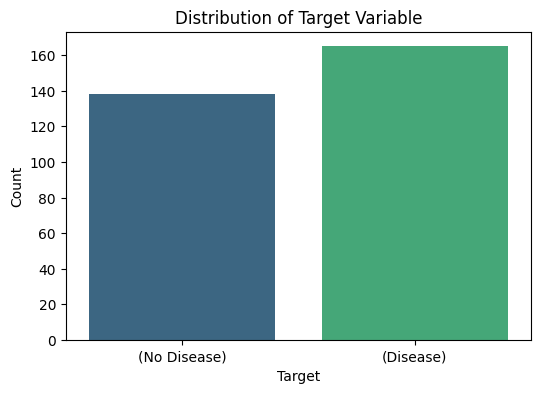

In [13]:
target_temp = data["target"].value_counts()
print(target_temp)
# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=target_temp.index, y=target_temp.values, palette="viridis",hue=None)

# Add labels and title
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.xticks(ticks=[0, 1], labels=["(No Disease)", "(Disease)"])
plt.show()


### We notice, that females are more likely to have heart problems than males

# Making the data more simple

In [14]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

assigning levels to categories

In [15]:
list = []
for i in range(0,data.shape[1]):
  if(data.iloc[:,i].dtypes == 'category'):
    data.iloc[:,i] = pd.Categorical(data.iloc[:,i])
    data.iloc[:,i] = data.iloc[:,i].cat.codes
    data.iloc[:,i] = data.iloc[:,i].astype('category')
    list.append(data.columns[i])

<ipython-input-16-2be45e3497c5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=data,palette="bwr")


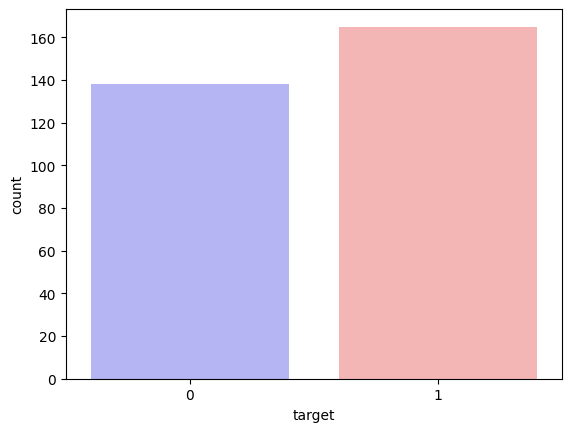

In [16]:
sns.countplot(x='target',data=data,palette="bwr")
plt.show()

In [17]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


----------------------------------------------------------------------------------------------------------------------------

---



In [18]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


------------------------------------------------------------------------------------

# Heart disease frequency for ages

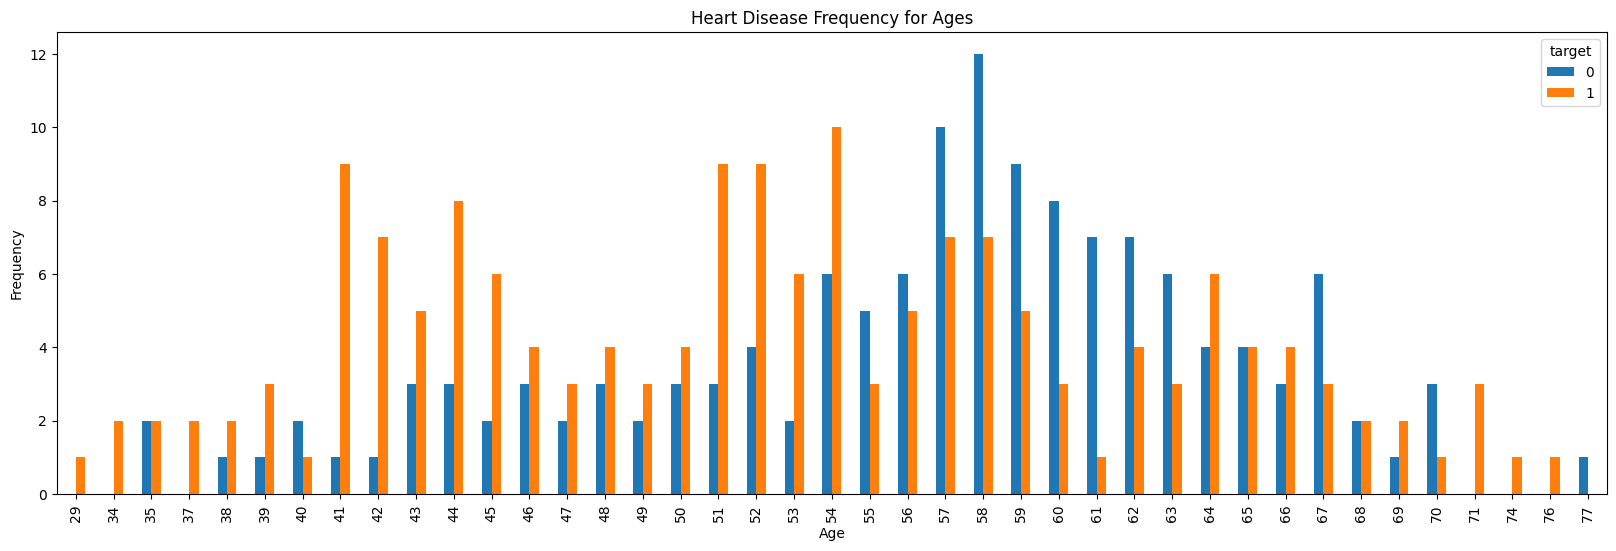

In [19]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Heart Disease Frequency for male and female

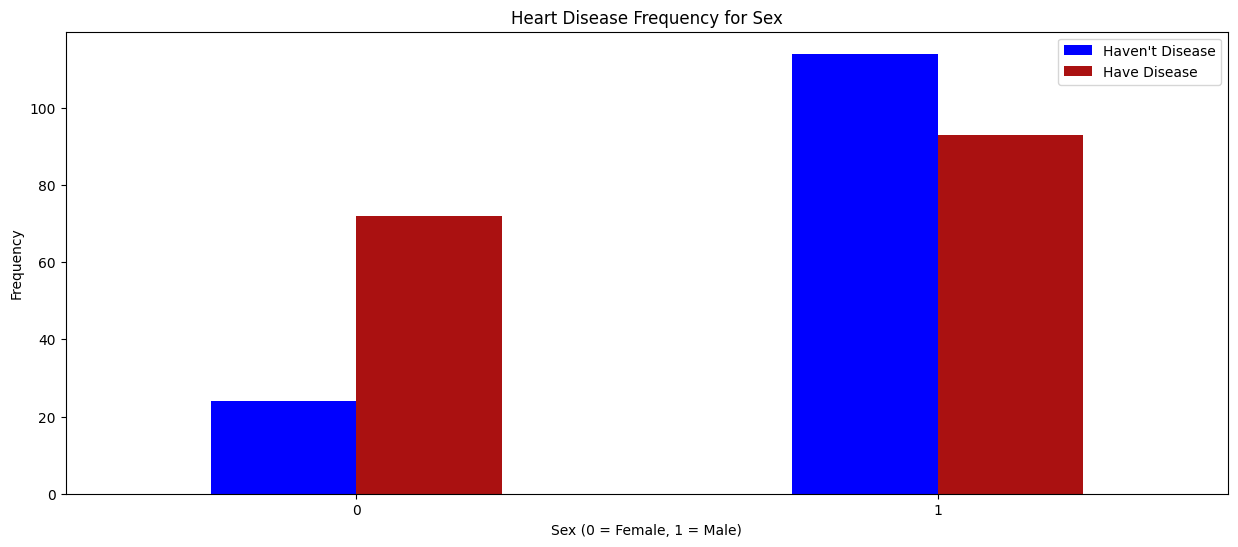

In [20]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

# Thalassemia vs cholesterol

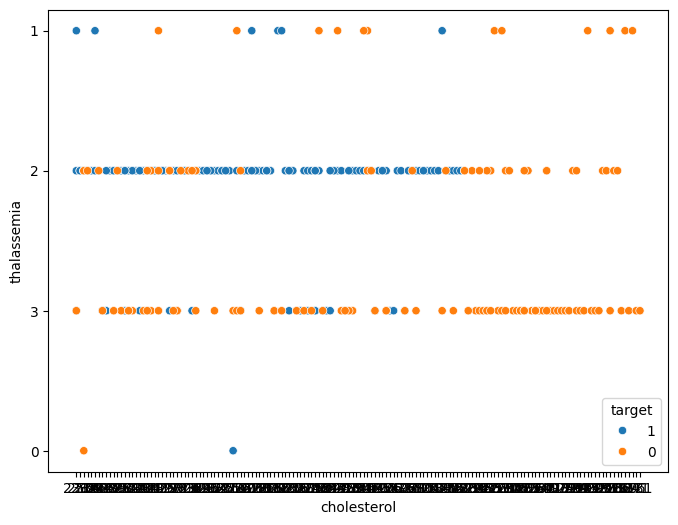

In [21]:
data['target'] = data['target'].astype(str)
data['thalassemia'] = data['thalassemia'].astype(str)
data['cholesterol'] = data['cholesterol'].astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='cholesterol', y='thalassemia', data=data, hue='target')
plt.show()


# Thalassemia vs resting blood pressure

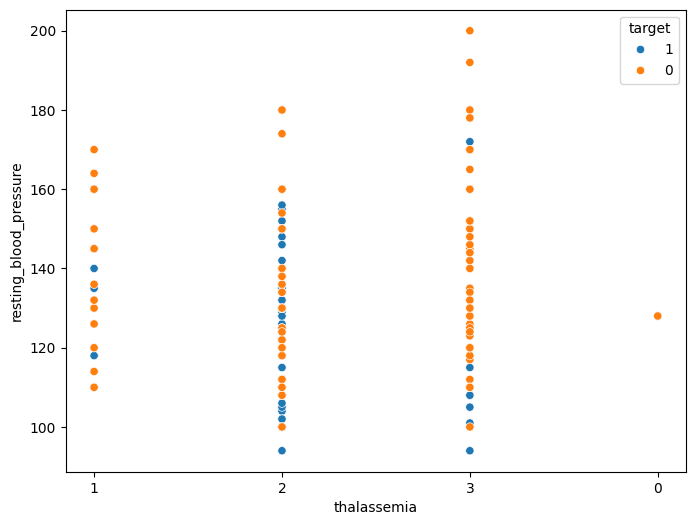

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

# Age vs Maximum heart disease rate

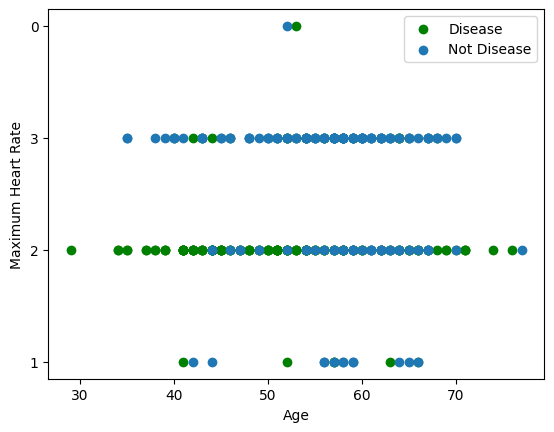

In [23]:
plt.scatter(x=data.age[data.target=='1'], y=data.thalassemia[(data.target=='1')], c="green")
plt.scatter(x=data.age[data.target=='0'], y=data.thalassemia[(data.target=='0')])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


# Fasting Blood sugar Data

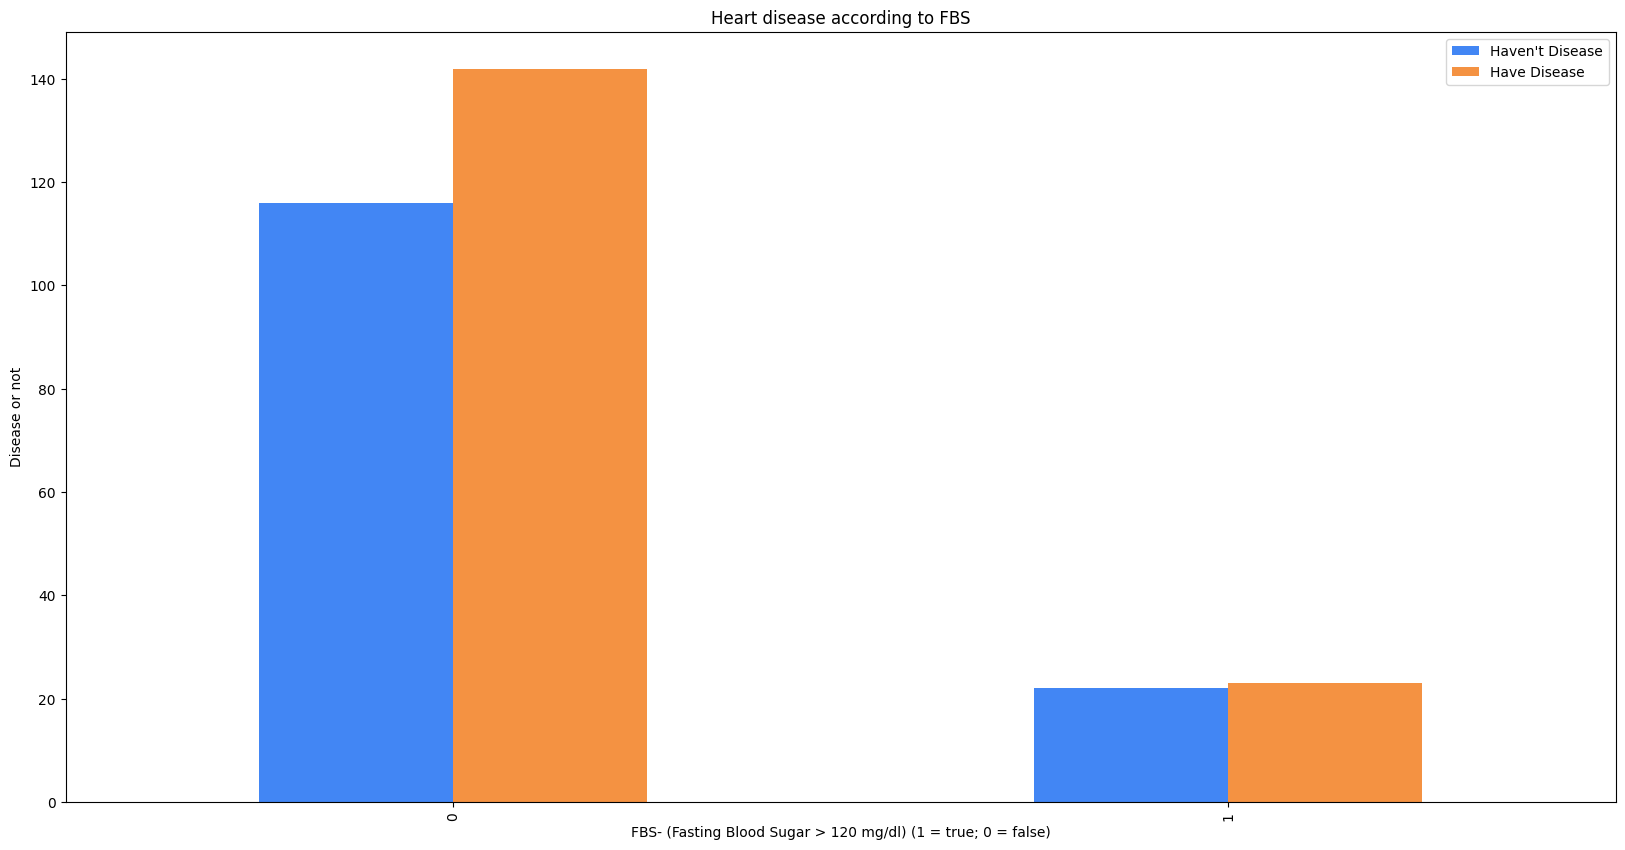

In [24]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

# Missing Value Analysis

In [25]:
data.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholesterol,0
fasting_blood_sugar,0
rest_ecg,0
max_heart_rate_achieved,0
exercise_induced_angina,0
st_depression,0


# Feature Selection

In [26]:
names=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

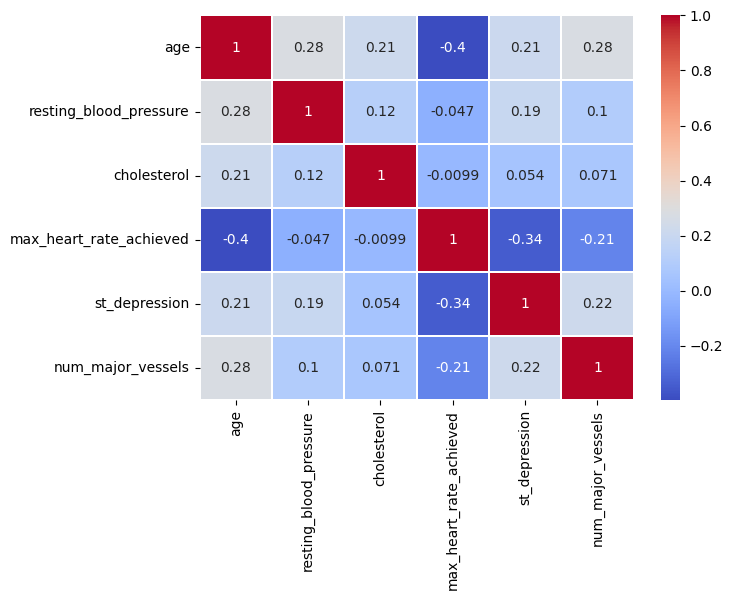

In [27]:
f, ax = plt.subplots(figsize=(7, 5))

df_corr = data.loc[:,names]

corr = df_corr.corr()

sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

# Correlation analysis

In [28]:
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,2
301,57,130,131,115,1.2,1


# Train Test Split

In [29]:
predictors = data.drop("target",axis=1)
target = data["target"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [30]:
X_train.shape

(242, 13)

In [31]:
X_test.shape

(61, 13)

In [32]:
Y_train.shape

(242,)

In [33]:
Y_test.shape

(61,)

# Model Fitting

## Naive Bayes

---



In [34]:
X_train.dtypes

,0
age,int64
sex,int64
chest_pain_type,int64
resting_blood_pressure,int64
cholesterol,object
fasting_blood_sugar,int64
rest_ecg,int64
max_heart_rate_achieved,int64
exercise_induced_angina,int64
st_depression,float64


In [35]:
nb = GaussianNB()

Y_train=Y_train.astype('int')

nb.fit(X_train,Y_train)


Y_pred_nb = nb.predict(X_test)

In [36]:
Y_pred_nb.shape

(61,)

In [37]:
CM=pd.crosstab(Y_test,Y_pred_nb)
CM

col_0,0,1
target,,
0,21,6
1,3,31


In [38]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [39]:
score_nb=((TP+TN)*100)/(TP+TN+FP+FN)
score_nb

85.24590163934427

In [40]:
fnr=FN*100/(FN+TP)
fnr

8.823529411764707



---



# Decision Tree

In [41]:
from sklearn.tree import export_graphviz

feature_names = data.drop(columns=["target"]).columns


C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)

C50_Predictions = C50_model.predict(X_test)

In [42]:
dotfile = open("pt.dot", 'w')
df = tree.export_graphviz(C50_model, out_file=dotfile,feature_names=X_train.columns)

In [43]:
CM = pd.crosstab(Y_test, C50_Predictions)
CM

col_0,0,1
target,,
0,22,5
1,7,27


In [44]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [45]:
score_dt=((TP+TN)*100)/(TP+TN+FP+FN)
score_dt

80.32786885245902

In [46]:
fnr=FN*100/(FN+TP)
fnr

20.58823529411765

# Logistic Regression

In [47]:
predictors = data.drop("target",axis=1)
target = data["target"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [48]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [49]:
Y_pred_lr.shape

(61,)

In [50]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


# Final Score

In [51]:
scores = [score_lr,score_nb,score_dt]
algorithms = ["Logistic Regression","Naive Bayes","Decision Tree"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.24590163934427 %
The accuracy score achieved using Decision Tree is: 80.32786885245902 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

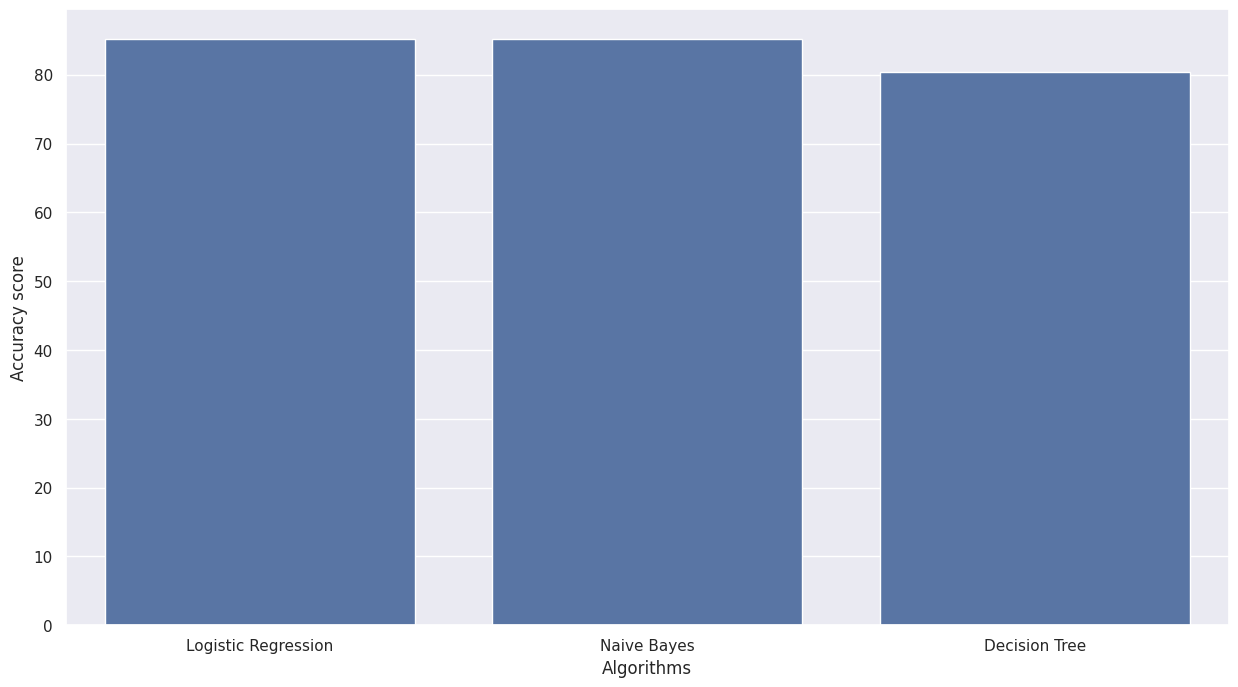

In [52]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

In [53]:
X_test

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [55]:
a=[]
age=int(input(' Enter your age'))
a.append(age)
sex=int(input(' Male=1,Female=0'))
a.append(sex)
chest_pain_type=int(input(' Chest Pain (0-3)'))
a.append(chest_pain_type)
resting_blood_pressure=int(input(' Enter Resting Blood Pressure'))
a.append(resting_blood_pressure)
cholesterol=int(input(' Enter cholesterol'))
a.append(cholesterol)
fasting_blood_sugar=int(input(' Fasting blood sugar>120mg/l, 1=True or 0=False'))
a.append(fasting_blood_sugar)
rest_ecg=int(input(' resting electrocardiographic results (values 0,1,2)'))
a.append(rest_ecg)
max_heart_rate_achieved=int(input(' maximum heart rate achieved'))
a.append(max_heart_rate_achieved)
exercise_induced_angina=int(input(' exercise induced angina,no=0,yes=1'))
a.append(exercise_induced_angina)
st_depression=float(input(' Enter ST depression (0-3)'))
a.append(st_depression)
st_slope=int(input(' St Slope upsloping=0,flat=1,downsloping=2'))
a.append(st_slope)
num_major_vessels=int(input(' number of major vessels (0-3) colored by flourosopy'))
a.append(num_major_vessels)
thalassemia=int(input(' Thalassemia Normal=1,fixed defect=2,reversible defect=3'))
a.append(thalassemia)

input_data = pd.DataFrame([a], columns=[
    'age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
    'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina',
    'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia'
])

input_data.to_csv('user_input.csv', index=False)

input_data_read = pd.read_csv('user_input.csv')

a_pred_nb = nb.predict(input_data_read)
a_Predictions = C50_model.predict(input_data_read)
a_pred_lr = lr.predict(input_data_read)
print('nb model',a_pred_nb)
print('dt model',a_Predictions)
print('lr model',a_pred_lr)

 Enter your age48
 Male=1,Female=00
 Chest Pain (0-3)2
 Enter Resting Blood Pressure130
 Enter cholesterol275
 Fasting blood sugar>120mg/l, 1=True or 0=False0
 resting electrocardiographic results (values 0,1,2)1
 maximum heart rate achieved139
 exercise induced angina,no=0,yes=10
 Enter ST depression (0-3)0.2
 St Slope upsloping=0,flat=1,downsloping=22
 number of major vessels (0-3) colored by flourosopy0
 Thalassemia Normal=1,fixed defect=2,reversible defect=32
nb model [1]
dt model [1]
lr model ['1']
